# Bitcoin Predicition Using ARIMA

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Bitcoin price is downloaded from Yahoo finance: https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guccounter=1&period1=1410912000&period2=1712275200

In [103]:
# Loading data

df = pd.read_csv("Data/BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [85]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3.489000e+03
mean,15657.929934,16025.214507,15268.215711,15675.985943,15675.985943,1.703698e+10
std,17319.817742,17739.186261,16863.794514,17337.895837,17337.895837,1.927305e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,998.617004,1013.520020,971.984009,999.181030,999.181030,2.018550e+08
50%,8603.428711,8775.631836,8360.620117,8620.566406,8620.566406,1.270678e+10
75%,26532.994141,26888.882813,26171.451172,26539.673828,26539.673828,2.742369e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [104]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3489 non-null   object 
 1   Open       3489 non-null   float64
 2   High       3489 non-null   float64
 3   Low        3489 non-null   float64
 4   Close      3489 non-null   float64
 5   Adj Close  3489 non-null   float64
 6   Volume     3489 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 190.9+ KB


In [105]:
# Check nulls

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [106]:
df.shape

(3489, 7)

In [107]:
# Convert the 'Timestamp' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index(['Date'])

In [108]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,34873527352
2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,50705240709
2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500,65980.812500,34488018367


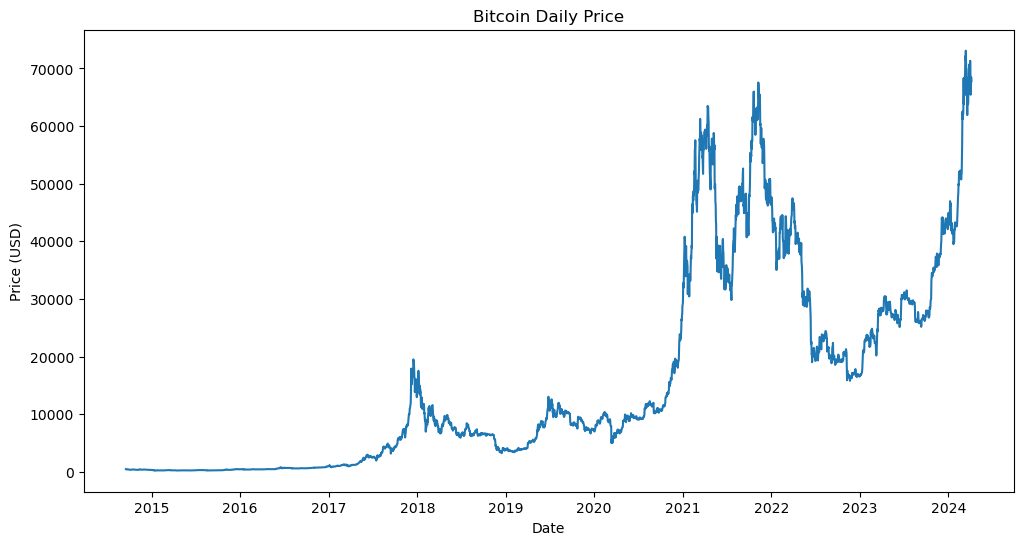

In [109]:
# Plotting

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"])
plt.title("Bitcoin Daily Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [110]:
# Resampling to monthly frequency
df_monthly = df.resample('M').mean()

In [111]:
df_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241832,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2023-12-31,42401.449849,43164.323715,41713.521421,42546.893523,42546.893523,2.328080e+10
2024-01-31,42910.015373,43785.563886,41974.453251,42919.612399,42919.612399,2.664255e+10
2024-02-29,49231.727101,50420.515221,48654.760776,49875.174300,49875.174300,2.864558e+10


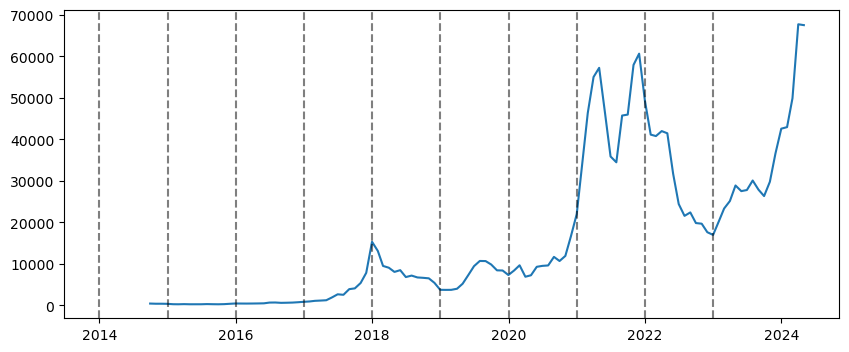

In [112]:
plt.figure(figsize=(10,4))
plt.plot(df_monthly['Close'])
for year in range(2014,2024):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

### Stationarity Check and Data Transformations

In [113]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test
adf_result = adfuller(df_monthly['Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreting the results
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -0.6502868807631239
p-value: 0.8592097218251611
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581
The time series is not stationary.


In [117]:
# Box-Cox transformation to stabilize the data.
from scipy.stats import boxcox
df_monthly['Close_box'], lambda_value = boxcox(df_monthly['Close'])
lambda_value

0.19324641027982098

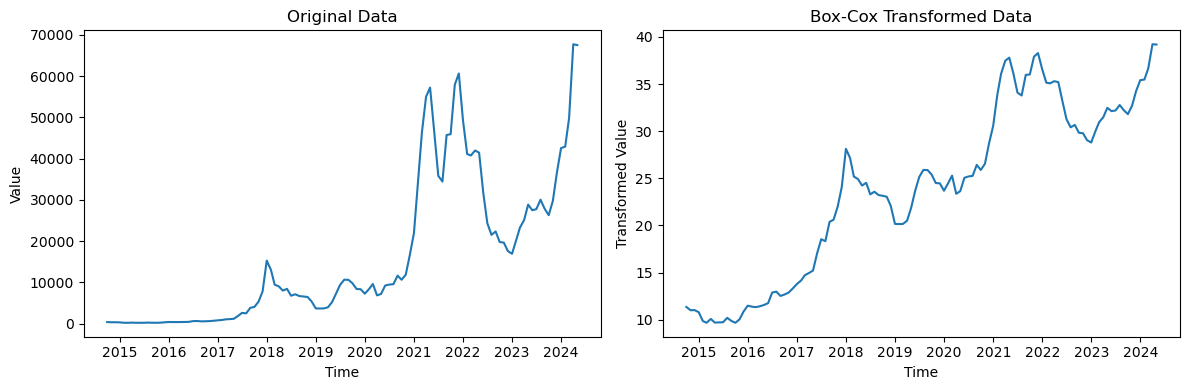

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(df_monthly['Close'])
ax[0].set_title('Original Data')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')

ax[1].plot(df_monthly['Close_box'])
ax[1].set_title('Box-Cox Transformed Data')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Transformed Value')

plt.tight_layout()
plt.show()

In [119]:
adf_result = adfuller(df_monthly['Close_box'])
print('p-value:', adf_result[1])
# Interpreting the results
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

p-value: 0.802808975733561
The time series is not stationary.


In [120]:
# Differencing
df_monthly['Close_box_seasonal_diff'] = df_monthly['Close_box'].diff(12)
adf_result = adfuller(df_monthly['Close_box_seasonal_diff'].dropna())
print('p-value:', adf_result[1])
# Interpreting the results
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

p-value: 0.22666835383323775
The time series is not stationary.


In [121]:
# Second Differencing
df_monthly['Close_sec_diff'] = df_monthly['Close_box_seasonal_diff'].diff(1)
adf_result = adfuller(df_monthly['Close_sec_diff'].dropna())
print('p-value:', adf_result[1])
# Interpreting the results
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

p-value: 9.592556685720987e-05
The time series is stationary.


### STL Decompositon

In [122]:
df_monthly.dropna(inplace=True)

In [123]:
df_monthly['Close_sec_diff'].isnull().sum()

0

In [124]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_monthly['Close_sec_diff'])
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid


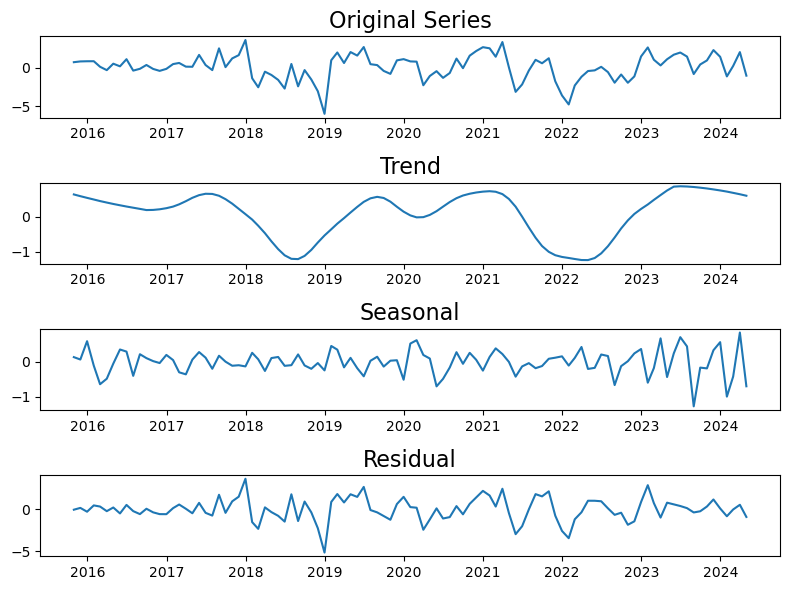

In [125]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df_monthly['Close_sec_diff'])
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

### Model Selection
we will use ACF and PACF to determine the parameters of ARIMA model.

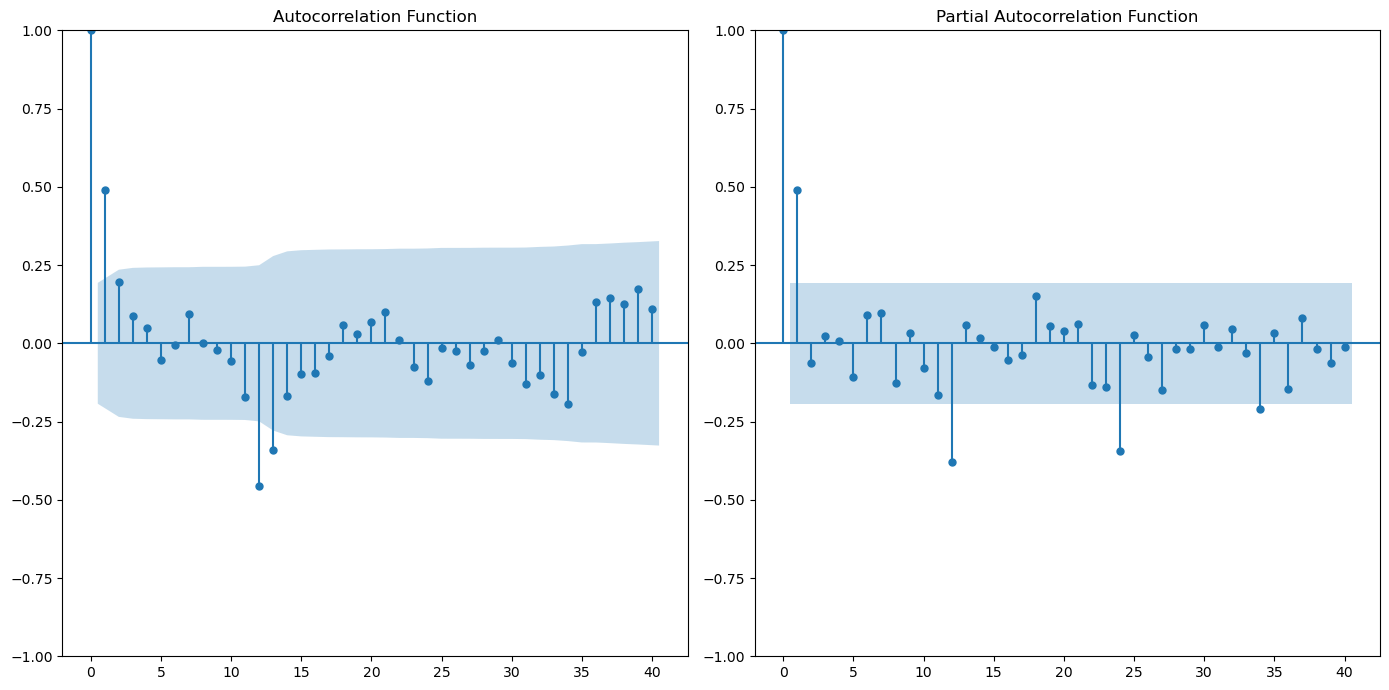

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plt.figure(figsize=(14, 7))
plt.subplot(121) 
plot_acf(df_monthly['Close_sec_diff'], ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122) 
plot_pacf(df_monthly['Close_sec_diff'], ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [173]:
# Split training and testing sets
# We will train the data on first 97 month then predict the last three month
train_size = 97
test_size = 6

train_df, test_df = df_monthly[:train_size], df_monthly[-test_size:]

train_df.shape, test_df.shape

((97, 9), (6, 9))

In [177]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model = auto_arima(train_df['Close_box'], start_p=0, start_q=0,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=335.425, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=297.002, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=311.999, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=281.820, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=281.695, Time=0.28 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=283.670, Time=0.52 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=283.031, Time=0.43 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=296.704, Time=0.23 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=283.235, Time=0.50 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=283.229, Time=0.40 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=282.498, Time=0.32 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=28

The best model found is SARIMAX(1, 1, 0)x(2, 1, [1], 12)

### Model Building

In [178]:


import statsmodels.api as sm
# Set up the SARIMAX model with the parameters found to be best (0, 1, 1)x(0, 1, 1, 12)
model = sm.tsa.statespace.SARIMAX(train_df['Close_box'],
                                  order=(1, 1, 0),
                                  seasonal_order=(2, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

# Fit the model
fitted_model = model.fit()
# Print the summary of the fitted model
print(fitted_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.96474D-01    |proj g|=  1.60123D-01

At iterate    5    f=  9.48519D-01    |proj g|=  3.83443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     13      1     0     0   9.871D-06   9.485D-01
  F =  0.94850170935735079     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                         

 This problem is unconstrained.


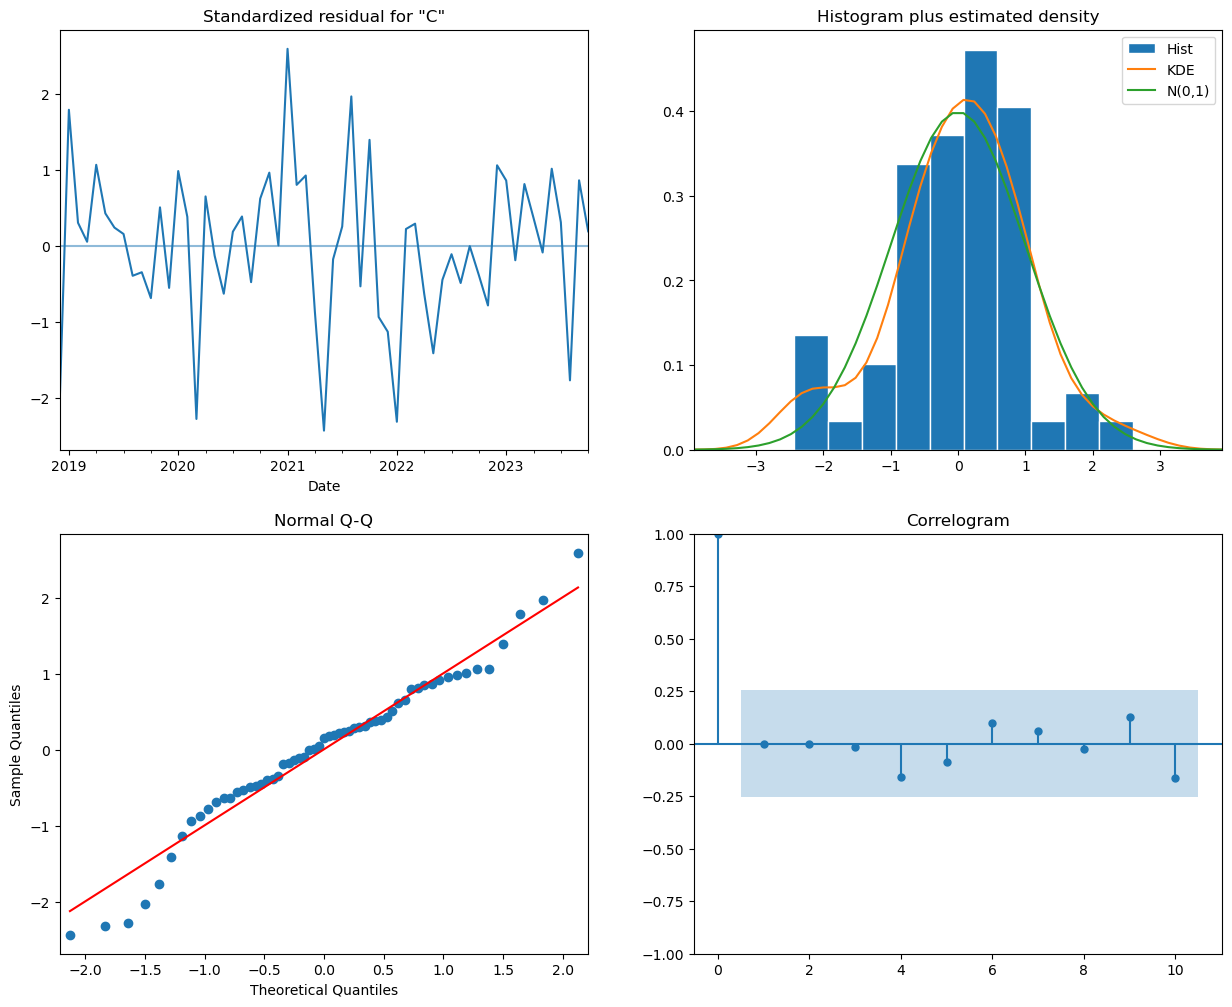

In [179]:
# Diagnostic checks
fitted_model.plot_diagnostics(figsize=(15, 12))
plt.show()

### Forecasting

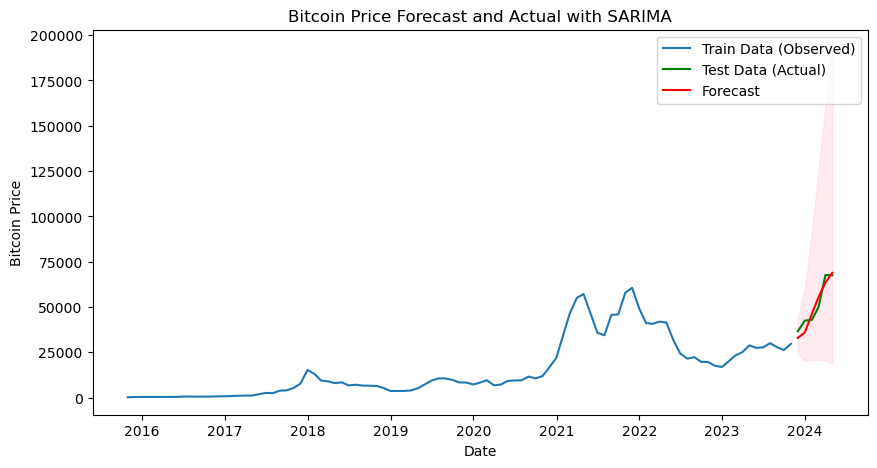

In [180]:
from scipy.special import inv_boxcox

# Forecasting
n_periods = 6 
forecast = fitted_model.get_forecast(steps=n_periods)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Invert Box-Cox Transformation on forecasted data
mean_forecast_original = inv_boxcox(mean_forecast, lambda_value)
conf_int_original = inv_boxcox(conf_int, lambda_value)

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_df.index, train_df['Close'], label='Train Data (Observed)')
plt.plot(test_df.index, test_df['Close'], label='Test Data (Actual)', color='green')
plt.plot(mean_forecast.index, mean_forecast_original, color='red', label='Forecast')
plt.fill_between(conf_int_original.index, 
                 conf_int_original.iloc[:, 0], 
                 conf_int_original.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast and Actual with SARIMA')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [181]:
# residual for SARIMA
residuals = test_df['Close'] - mean_forecast_original
residuals

Date
2023-11-30    3595.026362
2023-12-31    6585.163717
2024-01-31   -3275.913219
2024-02-29   -5474.788445
2024-03-31    4094.102615
2024-04-30   -1378.619162
Freq: M, dtype: float64

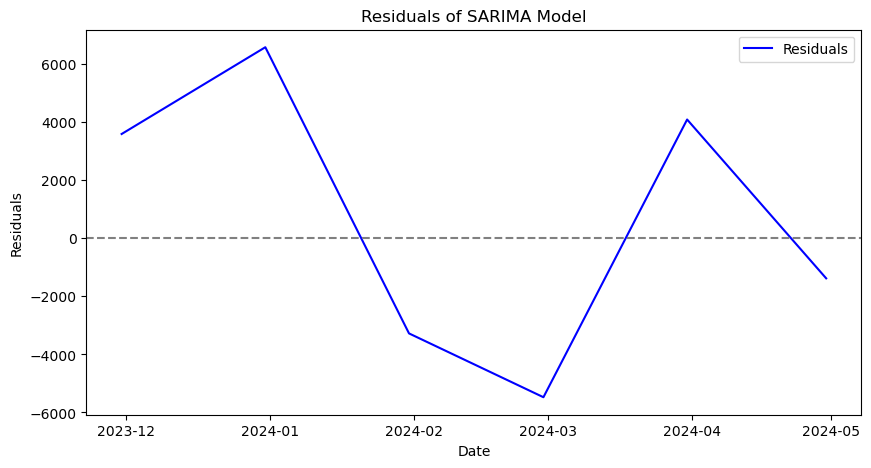

In [182]:

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals.index, residuals, label='Residuals', color='blue')
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Residuals of SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [183]:
from sklearn.metrics import mean_squared_error

# RMSE Calculation
rmse = np.sqrt(mean_squared_error(test_df['Close'], mean_forecast_original))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 4390.439968068364


### Rolling Forecast With SARIMA

In [185]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

history = boxcox(train_df['Close'], lambda_value).tolist()

predictions = []
actuals = []

for t in range(len(test_df)):
    model = SARIMAX(history, order=(1, 1, 0), seasonal_order=(2, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    
    # One step forecast and invert the transformation
    output = model_fit.forecast()
    yhat_original = inv_boxcox(output[0], lambda_value)
    predictions.append(yhat_original)

    # Actual observation (not transformed)
    actual = test_df['Close'].iloc[t]
    actuals.append(actual)

    # Update history with the actual observation (transformed)
    transformed_actual = boxcox(actual, lambda_value)
    history.append(transformed_actual)

In [187]:
# Calculate performance metrics
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 8883.146795909983


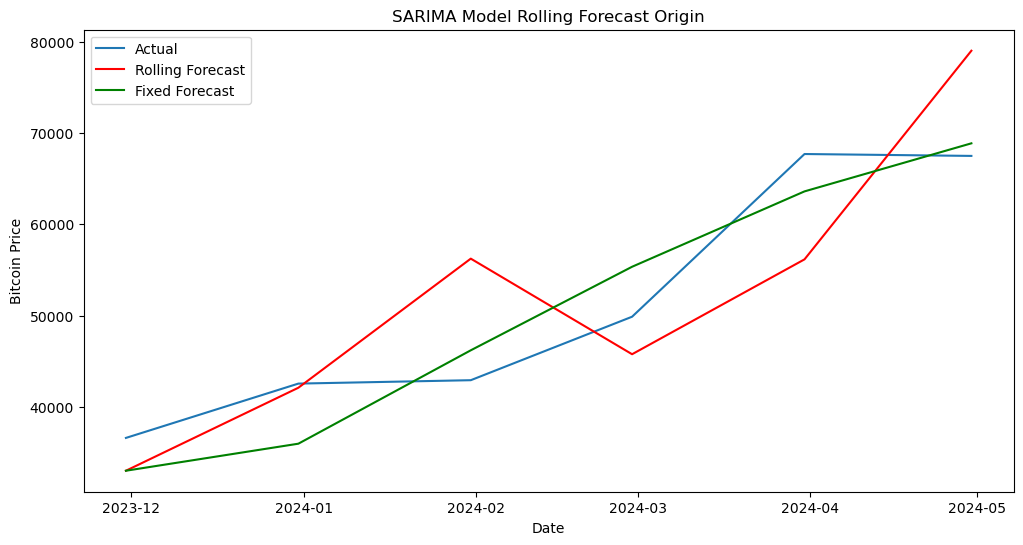

In [189]:
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, actuals, label='Actual')
plt.plot(test_df.index, predictions, color='red', label='Rolling Forecast')
plt.plot(test_df.index, mean_forecast_original, color='green', label='Fixed Forecast') 
plt.title('SARIMA Model Rolling Forecast Origin')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

For the prediction period of 6 month, our fixed forecast actually performed better than the rolling forecast.

### ARIMA Forecast

In [193]:
# Using auto_arima to find the optimal ARIMA model
model_arima = auto_arima(train_df['Close_box'], start_p=0, start_q=0,
                   test='adf',       # Use adftest to find optimal 'd'
                   max_p=5, max_q=5, # Maximum p and q
                   m=1,              # Frequency of the series
                   d=None,          # Let model determine 'd'
                   seasonal=False,   # No Seasonality
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=300.406, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=284.962, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=285.105, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=302.488, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=286.444, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=286.355, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=288.225, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=284.800, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=286.505, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=286.425, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=285.679, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=288.207, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.168 seconds
                               SARIMAX Results                                
Dep. Variable:       

Best parameters is ARIMA(1,1,0)

In [194]:
model_arima = sm.tsa.arima.ARIMA(train_df['Close_box'], order=(1, 1, 0))
# Fit the model
fitted_arima_model = model_arima.fit()

# Print the summary of the fitted model
print(fitted_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Close_box   No. Observations:                   97
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -140.400
Date:                Wed, 08 May 2024   AIC                            284.800
Time:                        01:16:24   BIC                            289.928
Sample:                    10-31-2015   HQIC                           286.873
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4306      0.068      6.330      0.000       0.297       0.564
sigma2         1.0887      0.141      7.742      0.000       0.813       1.364
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [195]:
# Generate forecast
forecast_results = fitted_arima_model.get_forecast(steps=n_periods)
forecasted_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int() 

# Inverting Box-Cox transformation
forecasted_values_original = inv_boxcox(forecasted_values, lambda_value)
conf_int_original = inv_boxcox(conf_int, lambda_value)


In [197]:
forecasted_values_original

2023-11-30    31349.631579
2023-12-31    32056.833553
2024-01-31    32365.322493
2024-02-29    32498.906689
2024-03-31    32556.570642
2024-04-30    32581.428636
Freq: M, Name: predicted_mean, dtype: float64

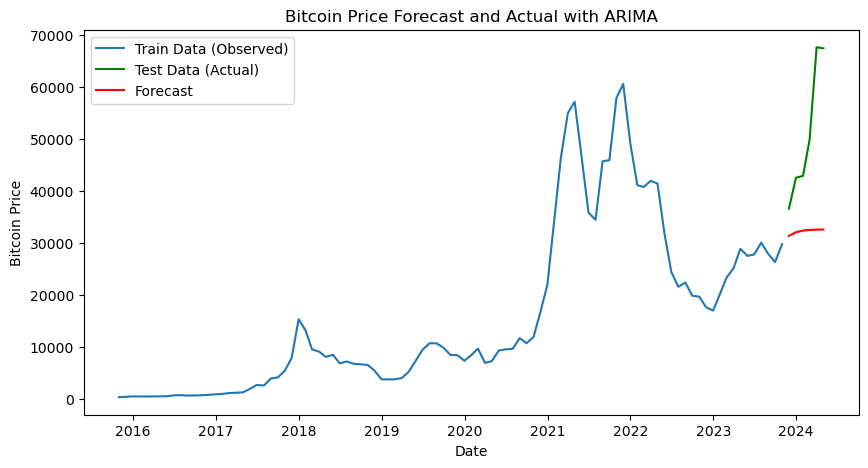

In [196]:
# Plotting the forecast along with training and test data
plt.figure(figsize=(10, 5))
plt.plot(train_df.index, train_df['Close'], label='Train Data (Observed)')  # Train data
plt.plot(test_df.index, test_df['Close'], label='Test Data (Actual)', color='green')  # Test data

# Plot the ARIMA forecasts
plt.plot(test_df.index, forecasted_values_original, color='red', label='Forecast')  # ARIMA forecast

plt.title('Bitcoin Price Forecast and Actual with ARIMA')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [198]:
# RMSE Calculation
rmse = np.sqrt(mean_squared_error(test_df['Close'], forecasted_values_original))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 22379.69515068207


we can see that there is some type of seasonal trend in bitcoin price, where SARIMA with fixed prediction gave us the best result.